In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
peyton = pd.read_csv('example_wp_log_peyton_manning.csv')

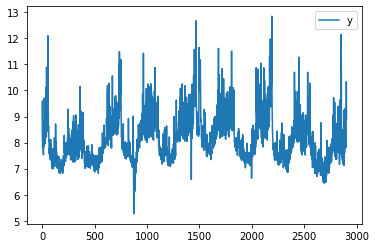

In [ ]:
peyton.plot()

In [ ]:
peyton.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
m = Prophet()
m.fit(peyton)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# forecasst 365 days ahead (create time frame)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040603,8.221024,9.465835,8.040603,8.040603,0.803055,0.803055,0.803055,0.352293,0.352293,0.352293,0.450762,0.450762,0.450762,0.0,0.0,0.0,8.843657
1,2007-12-11,8.039061,7.980005,9.199261,8.039061,8.039061,0.553139,0.553139,0.553139,0.119645,0.119645,0.119645,0.433495,0.433495,0.433495,0.0,0.0,0.0,8.592200
2,2007-12-12,8.037518,7.829452,8.998676,8.037518,8.037518,0.350502,0.350502,0.350502,-0.066660,-0.066660,-0.066660,0.417162,0.417162,0.417162,0.0,0.0,0.0,8.388020
3,2007-12-13,8.035976,7.701329,8.974635,8.035976,8.035976,0.329951,0.329951,0.329951,-0.072258,-0.072258,-0.072258,0.402209,0.402209,0.402209,0.0,0.0,0.0,8.365927
4,2007-12-14,8.034434,7.718343,9.020623,8.034434,8.034434,0.319465,0.319465,0.319465,-0.069577,-0.069577,-0.069577,0.389042,0.389042,0.389042,0.0,0.0,0.0,8.353899


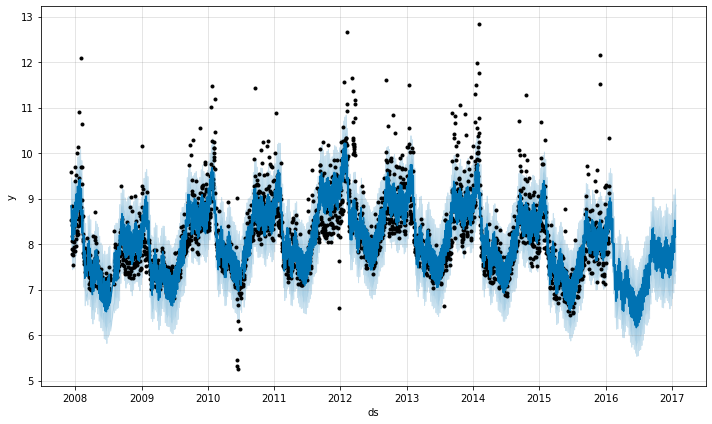

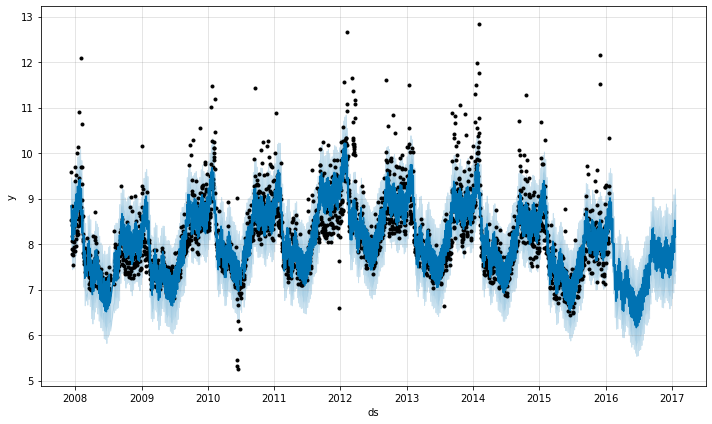

In [ ]:
m.plot(forecast)

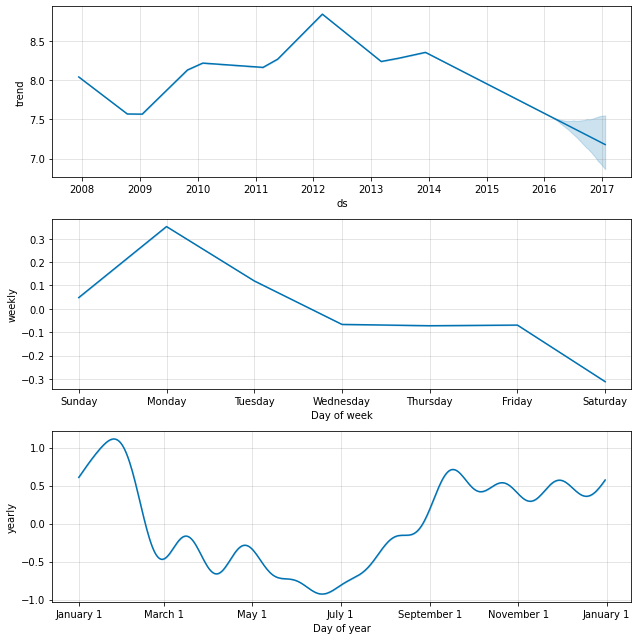

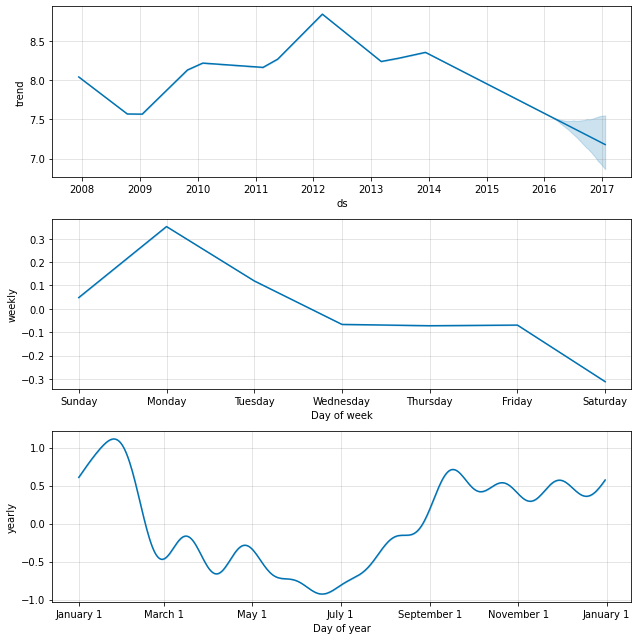

In [ ]:
m.plot_components(forecast)

In [ ]:
#bring in holidays

playoffs = pd.DataFrame({
    'holiday': 'playoff',
    'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                          '2010-01-24', '2010-02-07', '2011-01-08',
                          '2013-01-12', '2014-01-12', '2014-01-19',
                          '2014-02-02', '2015-01-11', '2016-01-17',
                          '2016-01-24', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1
})

superbowls = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1
})

holidays = pd.concat((playoffs, superbowls))

In [ ]:
#fit and predict
m = Prophet(holidays=holidays)
forecast = m.fit(peyton).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224043,1.199289
2191,2014-02-03,1.902375,1.462001
2532,2015-01-11,1.224043,0.000000
2533,2015-01-12,1.902375,0.000000
2901,2016-01-17,1.224043,0.000000
2902,2016-01-18,1.902375,0.000000
2908,2016-01-24,1.224043,0.000000
2909,2016-01-25,1.902375,0.000000
2922,2016-02-07,1.224043,1.199289
2923,2016-02-08,1.902375,1.462001


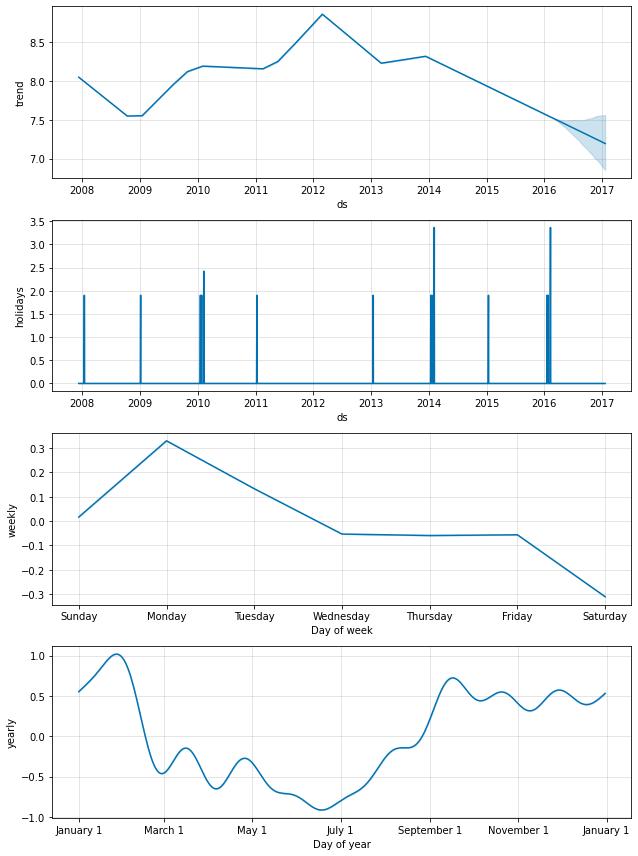

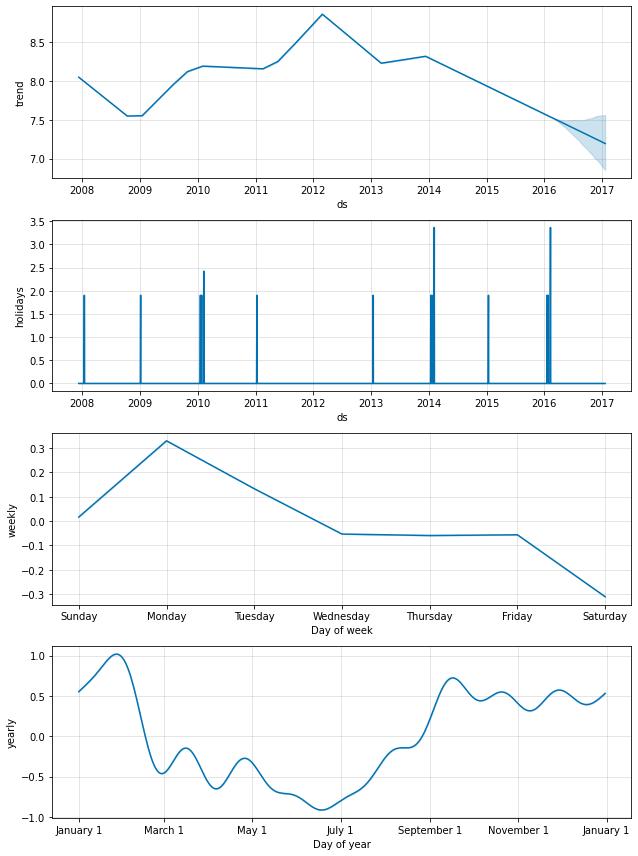

In [ ]:
m.plot_components(forecast)

## Predicting CO2


In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

co2['ds'] = co2.index
co2.rename(columns={'co2': 'y'}, inplace=True)

co2.tail()


,y,ds
2001-12-01,370.3,2001-12-01
2001-12-08,370.8,2001-12-08
2001-12-15,371.2,2001-12-15
2001-12-22,371.3,2001-12-22
2001-12-29,371.5,2001-12-29


In [ ]:
model = Prophet()
model.fit(co2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=120, freq='M', include_history=True)
future.tail()

,ds
2399,2011-07-31
2400,2011-08-31
2401,2011-09-30
2402,2011-10-31
2403,2011-11-30


In [ ]:
forecast = model.predict(forecast)

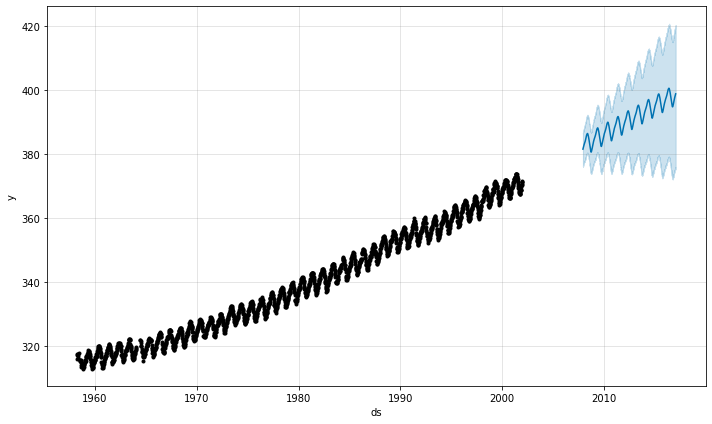

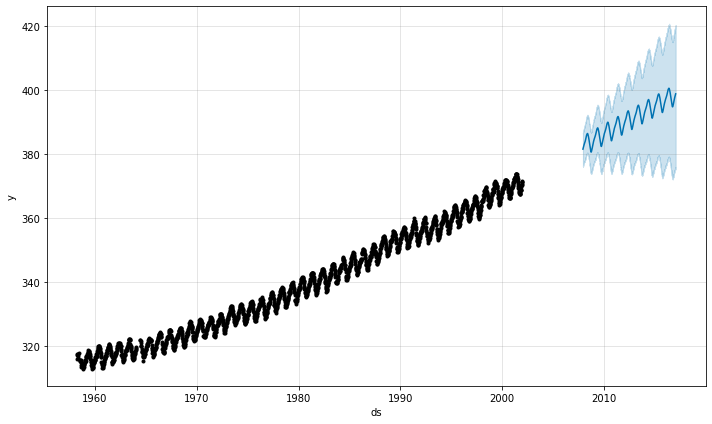

In [ ]:
model.plot(forecast)

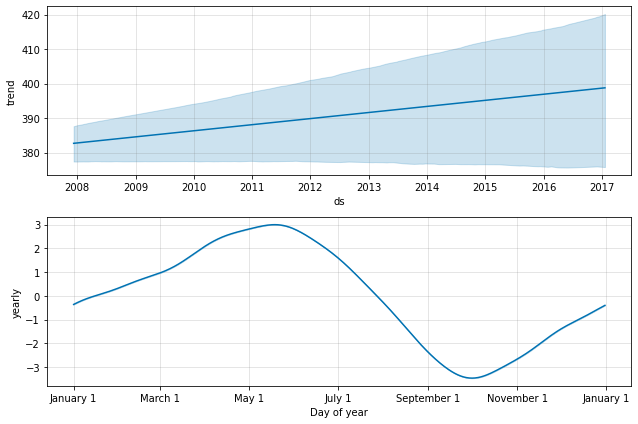

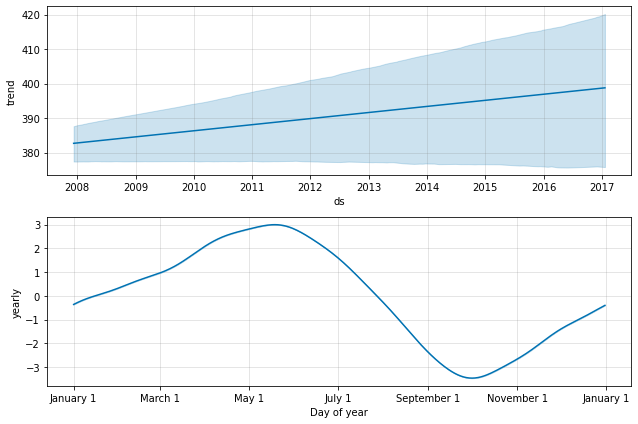

In [ ]:
model.plot_components(forecast)

In [ ]:
# Growth limitation...


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


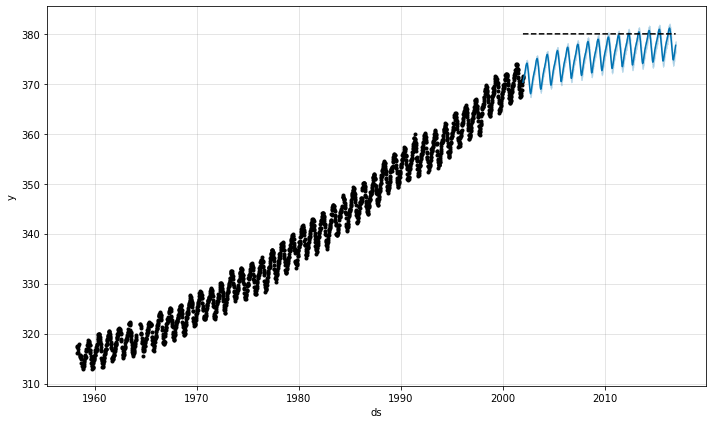

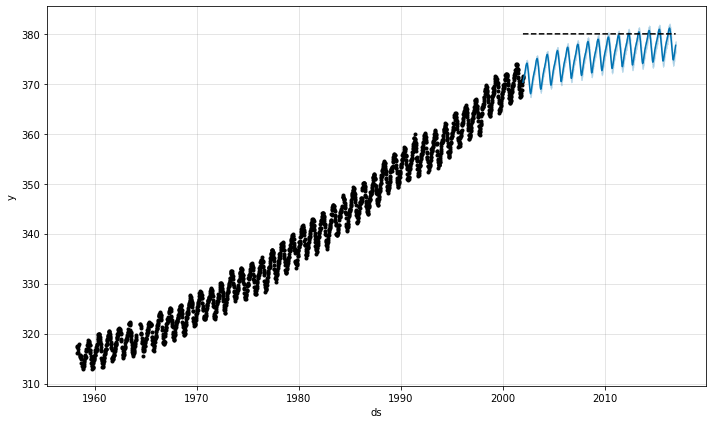

In [ ]:
co2['cap'] = 380
m = Prophet(growth='logistic')
m.fit(co2)

future = m.make_future_dataframe(periods=365*15, include_history=False)
future['cap'] = 380

forecast = m.predict(future)
m.plot(forecast)